In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


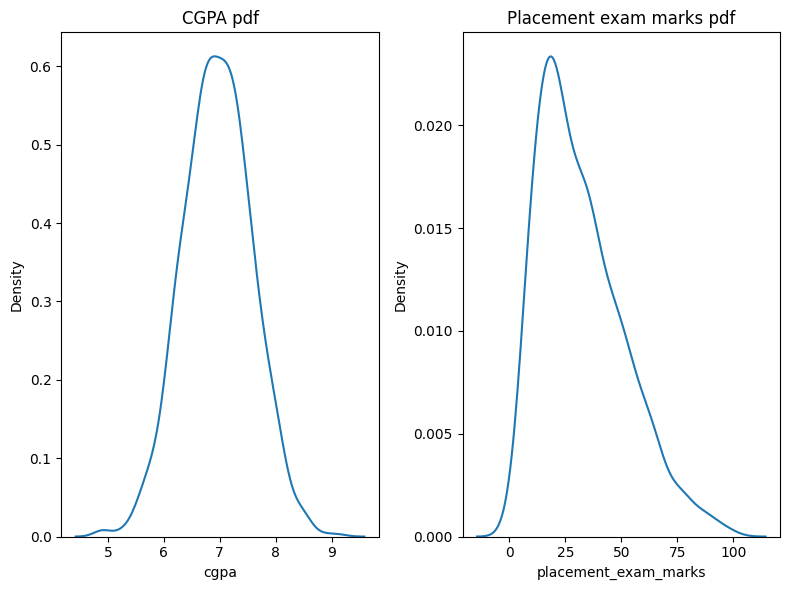

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8,6))
sns.kdeplot(df['cgpa'], ax=axs[0])
axs[0].set_title('CGPA pdf')

sns.kdeplot(df['placement_exam_marks'], ax=axs[1])
axs[1].set_title('Placement exam marks pdf')
plt.tight_layout()
plt.show()

### The Z-Score method can only be applied to the CGPA column as it shows a normal distribution. However the placement_exam_marks column shows a right-skewed distribution, so it is better to not apply the Z-Score method to it.

In [6]:
mean = df['cgpa'].mean()
std = df['cgpa'].std()
cgpa_min = df['cgpa'].min()
cgpa_max = df['cgpa'].max()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Min: {cgpa_min}")
print(f"Max: {cgpa_max}")

Mean: 6.96124
Standard Deviation: 0.6158978751323896
Min: 4.89
Max: 9.12


In [7]:
highest = mean + 3*(std)
lowest = mean - 3*(std)

print(f"Highest Value Allowed: {highest}")
print(f"Lowest Value Allowed: {lowest}")

Highest Value Allowed: 8.808933625397168
Lowest Value Allowed: 5.113546374602832


In [8]:
outliers = df[(df['cgpa'] < lowest) | (df['cgpa'] > highest)]

In [9]:
outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [41]:
df_without_outliers = df[(df['cgpa'] > lowest) & (df['cgpa'] < highest)]

In [43]:
df_without_outliers.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [45]:
df_without_outliers.shape

(995, 3)

## Approach 2
### Calculating the Z-Score

In [51]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [53]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [55]:
outliers = df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

In [57]:
outliers

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## Capping

In [62]:
df['cgpa'] = np.where(
    df['cgpa'] > highest, 
    highest,
    np.where(df['cgpa'] < lowest,
    lowest, 
    df['cgpa'])
)

In [64]:
df.shape

(1000, 4)

In [70]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64